In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics, model_selection, ensemble, neighbors, svm, tree, neural_network, base
import matplotlib.pyplot as plt

import importlib
import datetime
import mlTest
import preprocessing
importlib.reload(mlTest)
importlib.reload(preprocessing)
df = pd.read_csv("data/magic04.data", header=None)
df = preprocessing.convert_numeric(df, [10])
X, y = preprocessing.XySplit(df, 10)
X_train, X_val, X_test, X_train_val, y_train, y_val, y_test, y_train_val = mlTest.train_val_test_split(X, y, train_size=0.8, val_size=0.1)


C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [6]:
X_train_val.shape

(17118, 10)

In [7]:
# from sklearn.decomposition import PCA
pca = PCA()
X_PCA = pca.fit_transform(X_train_val)

0.9999934950205253


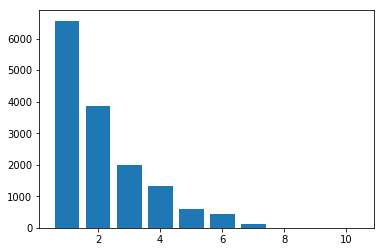

In [39]:
plt.bar(range(1, len(pca.explained_variance_ ) + 1), pca.explained_variance_ )
print(np.sum(pca.explained_variance_ratio_[0:7]))
# mlTest.saveNpArray([range(1, len(pca.explained_variance_ ) + 1), pca.explained_variance_ ], "MAGIC-PCA", descriptors="explained_variance")

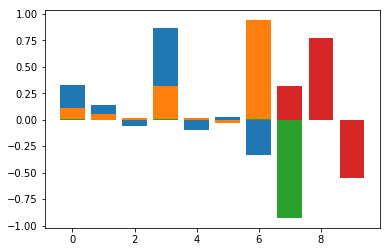

In [22]:
# pca.components_.shape
import matplotlib.pyplot as plt
for i in range(4):
    plt.bar(range(10), pca.components_[:, i])
    plt.plot()
mlTest.saveNpArray([pca.components_], "MAGIC-PCA", descriptors="components")

In [25]:
from sklearn.decomposition import FastICA
ica = FastICA()
X_ICA = ica.fit_transform(X_train_val)

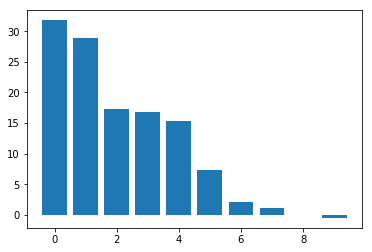

In [43]:
from scipy.stats import kurtosis
K = []
for i in range(10):
    k = kurtosis(X_ICA[:, i])
    K.append(k)
indices = np.argsort(K)
indices = indices[::-1]
K.sort()
K.reverse()
plt.bar(range(len(K)), K)
mlTest.saveNpArray(K, "MAGIC-ICA", descriptors="sorted-kurtosis")

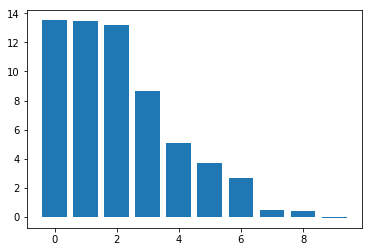

In [51]:
from scipy.stats import kurtosis
KPCA = []
for i in range(10):
    k = kurtosis(X_PCA[:, i])
    KPCA.append(k)
KPCA.sort()
KPCA.reverse()
plt.bar(range(len(K)), KPCA)
mlTest.saveNpArray(KPCA, "MAGIC-PCA", descriptors="kurtosis")

<BarContainer object of 10 artists>

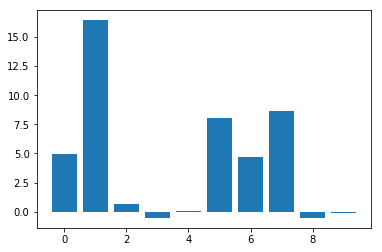

In [52]:
from scipy.stats import kurtosis
KPCA = []
for i in range(10):
    k = kurtosis(X_train_val.values[:, i])
    KPCA.append(k)
# KPCA.sort()
# KPCA.reverse()
plt.bar(range(len(K)), KPCA)
# mlTest.saveNpArray(KPCA, "MAGIC-PLAIN", descriptors="kurtosis")

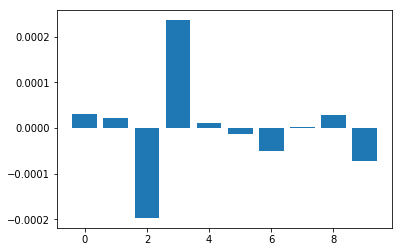

In [69]:
# pca.components_.shape
import matplotlib.pyplot as plt
# for i in range(3):
#     plt.bar(range(10), ica.components_[:, indices[i]])
#     plt.plot()
plt.bar(range(10), ica.components_[:, indices[1]])
mlTest.saveNpArray(ica.components_[:, indices[1]], "MAGIC-ICA", descriptors="2nd-kurtosis-axis")
# ica.components_[:, indices[0]]

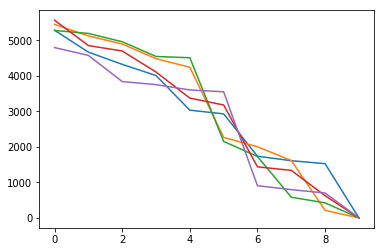

In [30]:
from sklearn import random_projection
Eseeds = []
for s in range(5):
    E = []
    for i in range(1, 11):
        transformer = random_projection.GaussianRandomProjection(n_components=i, random_state=s)
        X_random = transformer.fit_transform(X_train_val)
        cInv = np.linalg.pinv(transformer.components_)
        X_psuedo = np.matmul(cInv,X_random.transpose())
        X_psuedo = X_psuedo.transpose()
        error = ((X_train_val.values - X_psuedo) ** 2).mean()
        E.append(error)
    Eseeds.append(E)

for e in Eseeds:
    plt.plot(range(len(e)), e)

In [31]:
mlTest.saveNpArray(Eseeds, "MAGIC-RAND", descriptors="reconstruction-error")

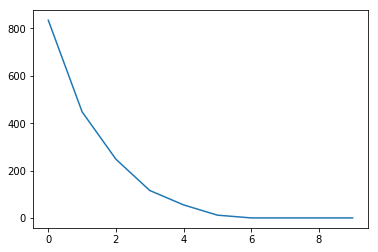

In [32]:
from sklearn import random_projection
E = []
for i in range(1, 11):
    transformer = PCA(n_components=i)
    X_p = transformer.fit_transform(X_train_val)
    error = ((X_train_val.values - transformer.inverse_transform(X_p)) ** 2).mean()
    E.append(error)

plt.plot(E)
    
    
# p = PCA()
# X_p = p.fit_transform(X_train_val)
mlTest.saveNpArray(E, "MAGIC-PCA", descriptors="reconstruction-error")

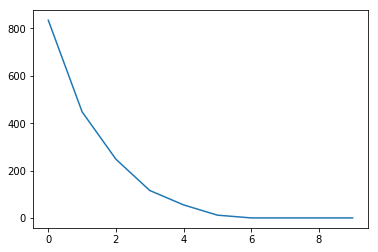

In [33]:
E = []
for i in range(1, 11):
    transformer = FastICA(n_components=i)
    X_p = transformer.fit_transform(X_train_val)
    error = ((X_train_val.values - transformer.inverse_transform(X_p)) ** 2).mean()
    E.append(error)

plt.plot(E)
    
    
# p = PCA()
# X_p = p.fit_transform(X_train_val)
mlTest.saveNpArray(E, "MAGIC-ICA", descriptors="reconstruction-error")

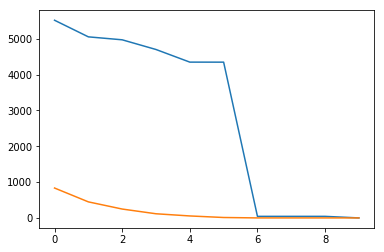

In [35]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
E_best = []
for i in range(1, 11):
    fvalue_selector = SelectKBest(f_classif, k=i)
    # Apply the SelectKBest object to the features and target
    X_kbest = fvalue_selector.fit_transform(X_train_val, y_train_val)
    error = ((X_train_val.values - fvalue_selector.inverse_transform(X_kbest)) ** 2).mean()
    E_best.append(error)

plt.plot(E_best)
plt.plot(E)

In [36]:
mlTest.saveNpArray(E_best, "MAGIC-ANOVA", descriptors="reconstruction-error")

CLUSTERINGGGGGGGGGGGGGGGG AGAINNNNNNNNNNNNNNN
b

In [70]:
# from sklearn.decomposition import PCA
pca = PCA()
X_PCA = pca.fit_transform(X_train_val)


In [73]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    print("k = {}".format(k))
    km = KMeans(n_clusters=k)
    km = km.fit(X_PCA)
    Sum_of_squared_distances.append(km.inertia_)

k = 1
k = 2
k = 3
k = 4
k = 5
k = 6
k = 7
k = 8
k = 9
k = 10
k = 11


KeyboardInterrupt: 

co = 1
0.512619815951594
co = 2
0.5126811979596694
co = 3
0.512619815951594
co = 4
0.512619815951594
co = 5
0.512619815951594
co = 6
0.512619815951594
co = 7
0.512619815951594
co = 8
0.512619815951594
co = 9
0.512619815951594
co = 10
0.512619815951594
2 0.738646674548561 0.39258292727282956


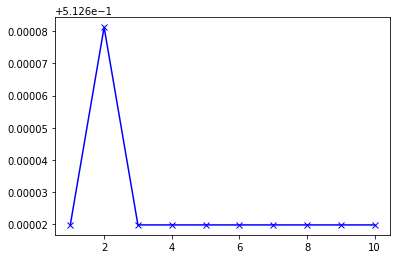

In [118]:
from scipy import stats
from sklearn.mixture import GaussianMixture
def ISApurityCalculation(X, y, k, min_c, max_c):
    C = range(min_c,max_c + 1, 1)
    hMean = []
    pHist = []
    cHist = []
    for co in C:
        print("co = {}".format(co))
        
        pca = PCA()
        X_PCA = pca.fit_transform(X)
        km = KMeans(n_clusters=k)
        km = km.fit(X_PCA)
        
        #for each cluster
        MPurity = []
        MCapture = []
        for c in range(k):
            cy = y[np.where(km.predict(X_PCA) == c)[0]]
            m = stats.mode(cy)
            MPurity.append(m[1][0] / len(cy))
            MCapture.append(m[1][0] / np.count_nonzero(y == m[0][0]))
        
        harmonic = 2.0 * np.mean(MPurity) * np.mean(MCapture) / (np.mean(MPurity) + np.mean(MCapture))
        pHist.append(np.mean(MPurity))
        cHist.append(np.mean(MCapture))
        hMean.append(harmonic)
        print(harmonic)
    return hMean, pHist, cHist
test, pHist, cHist = ISApurityCalculation(X, y, k=3, min_c=1, max_c=10) 
plt.plot(range(1, 11, 1), test, 'bx-')
print(range(1, 11, 1)[np.argmax(test)], pHist[np.argmax(test)], cHist[np.argmax(test)])
mlTest.saveNpArray([range(1, 11, 1 ), test], "MAGIC-PCA", descriptors="clusterTest")

co = 1
0.5500818768841822
co = 2
0.5890068347158222
co = 3
0.5828977874331646
co = 4
0.6744295763005747
co = 5
0.707939871218126
co = 6
0.7102485696636415
co = 7
0.7127609567945552
co = 8
0.7116159620766103
co = 9
0.7130321244750932
co = 10
0.7109808016636184
9 0.7198311352538689 0.706360349120893


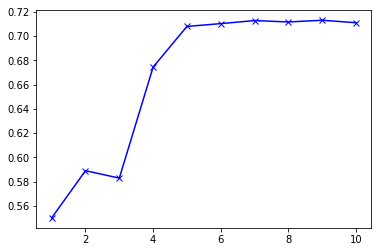

In [97]:
from scipy import stats
from sklearn.mixture import GaussianMixture
def ISApurityCalculation(X, y, k, min_c, max_c):
    C = range(min_c,max_c + 1, 1)
    hMean = []
    pHist = []
    cHist = []
    for co in C:
        print("co = {}".format(co))
        
        ica = FastICA(n_components=co)
        X_ICA = ica.fit_transform(X)
        km = KMeans(n_clusters=k)
        km = km.fit(X_ICA)
        
        #for each cluster
        MPurity = []
        MCapture = []
        for c in range(k):
            cy = y[np.where(km.predict(X_ICA) == c)[0]]
            m = stats.mode(cy)
            MPurity.append(m[1][0] / len(cy))
            MCapture.append(m[1][0] / np.count_nonzero(y == m[0][0]))
        
        harmonic = 2.0 * np.mean(MPurity) * np.mean(MCapture) / (np.mean(MPurity) + np.mean(MCapture))
        pHist.append(np.mean(MPurity))
        cHist.append(np.mean(MCapture))
        hMean.append(harmonic)
        print(harmonic)
    return hMean, pHist, cHist
test, pHist, cHist = ISApurityCalculation(X, y, k=2, min_c=1, max_c=10) 
plt.plot(range(1, 11, 1), test, 'bx-')
print(range(1, 11, 1)[np.argmax(test)], pHist[np.argmax(test)], cHist[np.argmax(test)])
mlTest.saveNpArray([range(1, 11, 1 ), test], "MAGIC-ICA", descriptors="clusterTest")

co = 1
0.5455134555864041
co = 2
0.5820914702391378
co = 3
0.5917236981564268
co = 4
0.5961370522265627
co = 5
0.5977986041314679
co = 6
0.6004145605855847
co = 7
0.5998072664854139
co = 8
0.5969767453956001
co = 9
0.6645273763442322
co = 10
0.6638731339508959
9 0.7444628135198237 0.6000933648717228


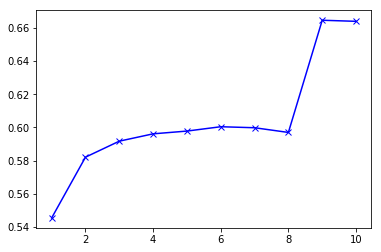

In [98]:
from scipy import stats
from sklearn.mixture import GaussianMixture
def ISApurityCalculation(X, y, k, min_c, max_c):
    C = range(min_c,max_c + 1, 1)
    hMean = []
    pHist = []
    cHist = []
    for co in C:
        print("co = {}".format(co))
        
        transformer = random_projection.GaussianRandomProjection(n_components=co, random_state=0)
        X_random = transformer.fit_transform(X)
        km = KMeans(n_clusters=k)
        km = km.fit(X_random)
        
        #for each cluster
        MPurity = []
        MCapture = []
        for c in range(k):
            cy = y[np.where(km.predict(X_random) == c)[0]]
            m = stats.mode(cy)
            MPurity.append(m[1][0] / len(cy))
            MCapture.append(m[1][0] / np.count_nonzero(y == m[0][0]))
        
        harmonic = 2.0 * np.mean(MPurity) * np.mean(MCapture) / (np.mean(MPurity) + np.mean(MCapture))
        pHist.append(np.mean(MPurity))
        cHist.append(np.mean(MCapture))
        hMean.append(harmonic)
        print(harmonic)
    return hMean, pHist, cHist
test, pHist, cHist = ISApurityCalculation(X, y, k=2, min_c=1, max_c=10) 
plt.plot(range(1, 11, 1), test, 'bx-')
print(range(1, 11, 1)[np.argmax(test)], pHist[np.argmax(test)], cHist[np.argmax(test)])
mlTest.saveNpArray([range(1, 11, 1 ), test], "MAGIC-RP", descriptors="clusterTest")

co = 1
0.5798548534114432
co = 2
0.5798548534114432
co = 3
0.5798548534114432
co = 4
0.5798548534114432
co = 5
0.5798548534114432
co = 6
0.5798548534114432
co = 7
0.5799694365958178
co = 8
0.5798548534114432
co = 9
0.5798548534114432
co = 10
0.5798548534114432
7 0.5940932765151515 0.5665015560326967


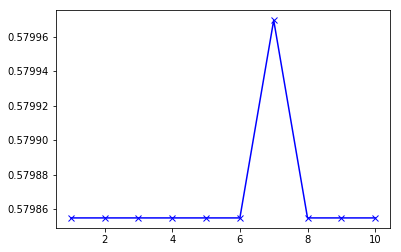

In [101]:
from scipy import stats
from sklearn.mixture import GaussianMixture
def ISApurityCalculation(X, y, k, min_c, max_c):
    C = range(min_c,max_c + 1, 1)
    hMean = []
    pHist = []
    cHist = []
    for co in C:
        print("co = {}".format(co))
        
        fvalue_selector = SelectKBest(f_classif, k=co)
        X_kbest = fvalue_selector.fit_transform(X, y)
        km = KMeans(n_clusters=k)
        km = km.fit(X_kbest)
        
        #for each cluster
        MPurity = []
        MCapture = []
        for c in range(k):
            cy = y[np.where(km.predict(X_kbest) == c)[0]]
            m = stats.mode(cy)
            MPurity.append(m[1][0] / len(cy))
            MCapture.append(m[1][0] / np.count_nonzero(y == m[0][0]))
        
        harmonic = 2.0 * np.mean(MPurity) * np.mean(MCapture) / (np.mean(MPurity) + np.mean(MCapture))
        pHist.append(np.mean(MPurity))
        cHist.append(np.mean(MCapture))
        hMean.append(harmonic)
        print(harmonic)
    return hMean, pHist, cHist
test, pHist, cHist = ISApurityCalculation(X, y, k=2, min_c=1, max_c=10) 
plt.plot(range(1, 11, 1), test, 'bx-')
print(range(1, 11, 1)[np.argmax(test)], pHist[np.argmax(test)], cHist[np.argmax(test)])
mlTest.saveNpArray([range(1, 11, 1 ), test], "MAGIC-ANOVA", descriptors="clusterTest")

EM

co = 1
0.5532809703041618
co = 2
0.5532767042564135
co = 3
0.5532767042564135
co = 4
0.5532767042564135
co = 5
0.5532767042564135
co = 6
0.5532767042564135
co = 7
0.5532767042564135
co = 8
0.5532767042564135
co = 9
0.5532767042564135
co = 10
0.5532767042564135
1 0.6192717721034623 0.5


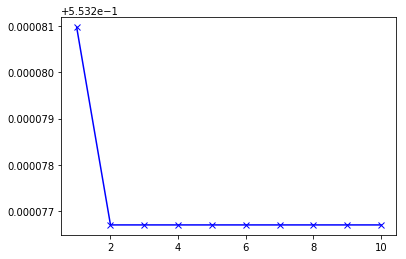

In [89]:
from scipy import stats
from sklearn.mixture import GaussianMixture
def ISApurityCalculation(X, y, k, min_c, max_c):
    C = range(min_c,max_c + 1, 1)
    hMean = []
    pHist = []
    cHist = []
    for co in C:
        print("co = {}".format(co))
        
        pca = PCA()
        X_PCA = pca.fit_transform(X)
        km = GaussianMixture(n_components=k)
        km = km.fit(X_PCA)
        
        #for each cluster
        MPurity = []
        MCapture = []
        for c in range(k):
            cy = y[np.where(km.predict(X_PCA) == c)[0]]
            m = stats.mode(cy)
            MPurity.append(m[1][0] / len(cy))
            MCapture.append(m[1][0] / np.count_nonzero(y == m[0][0]))
        
        harmonic = 2.0 * np.mean(MPurity) * np.mean(MCapture) / (np.mean(MPurity) + np.mean(MCapture))
        pHist.append(np.mean(MPurity))
        cHist.append(np.mean(MCapture))
        hMean.append(harmonic)
        print(harmonic)
    return hMean, pHist, cHist
test, pHist, cHist = ISApurityCalculation(X, y, k=2, min_c=1, max_c=10) 
plt.plot(range(1, 11, 1), test, 'bx-')
print(range(1, 11, 1)[np.argmax(test)], pHist[np.argmax(test)], cHist[np.argmax(test)])
mlTest.saveNpArray([range(1, 11, 1 ), test], "MAGIC-PCA-EM", descriptors="clusterTest")

co = 1
0.5429671528779036
co = 2
0.5970512967967725
co = 3
0.6120870287110081
co = 4
0.6139822497897649
co = 5
0.6184746673362778
co = 6
0.6168170846885866
co = 7
0.6563162294557662
co = 8
0.6427974689769478
co = 9
0.6217939959361721
co = 10
0.6122790930232257
7 0.6777140604707992 0.6362282522072734


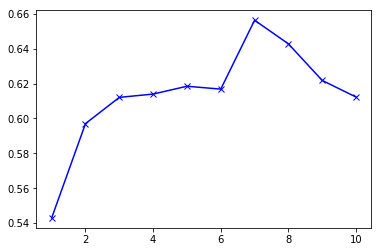

In [90]:


from scipy import stats
from sklearn.mixture import GaussianMixture
def ISApurityCalculation(X, y, k, min_c, max_c):
    C = range(min_c,max_c + 1, 1)
    hMean = []
    pHist = []
    cHist = []
    for co in C:
        print("co = {}".format(co))
        
        ica = FastICA(n_components=co)
        X_ICA = ica.fit_transform(X)
        km = GaussianMixture(n_components=k)
        km = km.fit(X_ICA)
        
        #for each cluster
        MPurity = []
        MCapture = []
        for c in range(k):
            cy = y[np.where(km.predict(X_ICA) == c)[0]]
            m = stats.mode(cy)
            MPurity.append(m[1][0] / len(cy))
            MCapture.append(m[1][0] / np.count_nonzero(y == m[0][0]))
        
        harmonic = 2.0 * np.mean(MPurity) * np.mean(MCapture) / (np.mean(MPurity) + np.mean(MCapture))
        pHist.append(np.mean(MPurity))
        cHist.append(np.mean(MCapture))
        hMean.append(harmonic)
        print(harmonic)
    return hMean, pHist, cHist
test, pHist, cHist = ISApurityCalculation(X, y, k=2, min_c=1, max_c=10) 
plt.plot(range(1, 11, 1), test, 'bx-')
print(range(1, 11, 1)[np.argmax(test)], pHist[np.argmax(test)], cHist[np.argmax(test)])
mlTest.saveNpArray([range(1, 11, 1 ), test], "MAGIC-ICA-EM", descriptors="clusterTest")

co = 1
0.5559322667202231
co = 2
0.5555346730989803
co = 3
0.551792189303822
co = 4
0.6087341376889296
co = 5
0.548888101377195
co = 6
0.6111464937188964
co = 7
0.6249353491637295
co = 8
0.6109895448435076
co = 9
0.5506902315295875
co = 10
0.5513497447912638
7 0.6314369642772537 0.6185662577772536


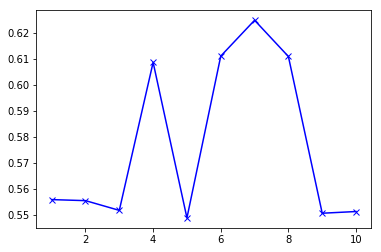

In [93]:

from scipy import stats
from sklearn.mixture import GaussianMixture
def ISApurityCalculation(X, y, k, min_c, max_c):
    C = range(min_c,max_c + 1, 1)
    hMean = []
    pHist = []
    cHist = []
    for co in C:
        print("co = {}".format(co))
        
        transformer = random_projection.GaussianRandomProjection(n_components=co, random_state=0)
        X_random = transformer.fit_transform(X)
        km = GaussianMixture(n_components=k)
        km = km.fit(X_random)
        
        #for each cluster
        MPurity = []
        MCapture = []
        for c in range(k):
            cy = y[np.where(km.predict(X_random) == c)[0]]
            m = stats.mode(cy)
            MPurity.append(m[1][0] / len(cy))
            MCapture.append(m[1][0] / np.count_nonzero(y == m[0][0]))
        
        harmonic = 2.0 * np.mean(MPurity) * np.mean(MCapture) / (np.mean(MPurity) + np.mean(MCapture))
        pHist.append(np.mean(MPurity))
        cHist.append(np.mean(MCapture))
        hMean.append(harmonic)
        print(harmonic)
    return hMean, pHist, cHist
test, pHist, cHist = ISApurityCalculation(X, y, k=2, min_c=1, max_c=10) 
plt.plot(range(1, 11, 1), test, 'bx-')
print(range(1, 11, 1)[np.argmax(test)], pHist[np.argmax(test)], cHist[np.argmax(test)])
mlTest.saveNpArray([range(1, 11, 1 ), test], "MAGIC-RP-EM", descriptors="clusterTest")

co = 1
0.5532767042564135
co = 2
0.5532767042564135
co = 3
0.5532767042564135
co = 4
0.5532809703041618
co = 5
0.5532767042564135
co = 6
0.5532767042564135
co = 7
0.5532767042564135
co = 8
0.5532767042564135
co = 9
0.5532767042564135
co = 10
0.5532767042564135
4 0.6192717721034623 0.5


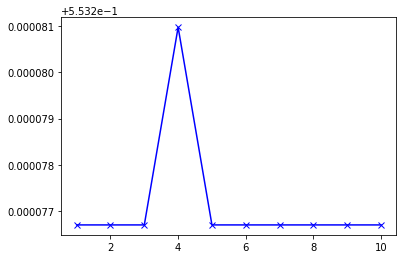

In [102]:
from scipy import stats
from sklearn.mixture import GaussianMixture
def ISApurityCalculation(X, y, k, min_c, max_c):
    C = range(min_c,max_c + 1, 1)
    hMean = []
    pHist = []
    cHist = []
    for co in C:
        print("co = {}".format(co))
        
#         fvalue_selector = SelectKBest(f_classif, k=co)
#         X_kbest = fvalue_selector.fit_transform(X, y)
        km = GaussianMixture(n_components=k)
        km = km.fit(X)
        
        #for each cluster
        MPurity = []
        MCapture = []
        for c in range(k):
            cy = y[np.where(km.predict(X) == c)[0]]
            m = stats.mode(cy)
            MPurity.append(m[1][0] / len(cy))
            MCapture.append(m[1][0] / np.count_nonzero(y == m[0][0]))
        
        harmonic = 2.0 * np.mean(MPurity) * np.mean(MCapture) / (np.mean(MPurity) + np.mean(MCapture))
        pHist.append(np.mean(MPurity))
        cHist.append(np.mean(MCapture))
        hMean.append(harmonic)
        print(harmonic)
    return hMean, pHist, cHist
test, pHist, cHist = ISApurityCalculation(X, y, k=2, min_c=1, max_c=10) 
plt.plot(range(1, 11, 1), test, 'bx-')
print(range(1, 11, 1)[np.argmax(test)], pHist[np.argmax(test)], cHist[np.argmax(test)])
# mlTest.saveNpArray([range(1, 11, 1 ), test], "MAGIC-ANOVA-EM", descriptors="clusterTest")

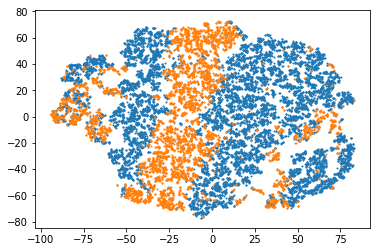

In [123]:
d1 = "20190319-190144-MAGIC-TSNE-.npy"
X_TSNE = np.load("npData/" + d1)
d1 = "20190319-190144-MAGIC-Data-.npy"
X =np.load("npData/" + d1)
d1 = "20190319-190144-MAGIC-y-.npy"
y =np.load("npData/" + d1)

fvalue_selector = SelectKBest(f_classif, k=1)
X_kbest = fvalue_selector.fit_transform(X, y)
km = KMeans(n_clusters=2)
km = km.fit(X_kbest)
mlTest.saveNpArray(km.labels_, "MAGIC-KMeans-ANOVA", descriptors="1-2k-labels")
for i in range(0, 40):
    where = np.where(km.labels_ ==i)
    plt.scatter(X_TSNE[where[0], 0], X_TSNE[where[0], 1], s=1)

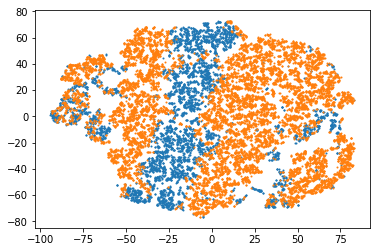

In [124]:
ica = FastICA(n_components=9)
X_ICA = ica.fit_transform(X)
km = KMeans(n_clusters=2)
km = km.fit(X_ICA)
mlTest.saveNpArray(km.labels_, "MAGIC-KMeans-ICA", descriptors="9c-2k-labels")
for i in range(0, 40):
    where = np.where(km.labels_ ==i)
    plt.scatter(X_TSNE[where[0], 0], X_TSNE[where[0], 1], s=1)

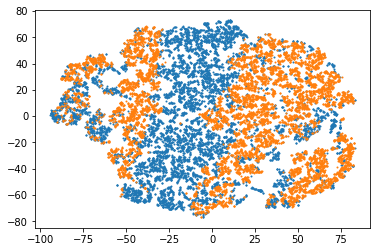

In [125]:
fvalue_selector = SelectKBest(f_classif, k=1)
X_kbest = fvalue_selector.fit_transform(X, y)
km = GaussianMixture(n_components=2)
km = km.fit(X_kbest)
labels = km.predict(X_kbest)
mlTest.saveNpArray(labels, "MAGIC-EM-ANOVA", descriptors="1c-7k-labels")
for i in range(0, 40):
    where = np.where(labels ==i)
    plt.scatter(X_TSNE[where, 0], X_TSNE[where, 1], s=1)

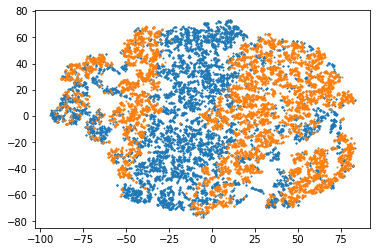

In [126]:
ica = FastICA(n_components=7)
X_ICA = ica.fit_transform(X)
km = GaussianMixture(n_components=2)
km = km.fit(X_kbest)
labels = km.predict(X_kbest)
mlTest.saveNpArray(labels, "MAGIC-EM-ICA", descriptors="7c-7k-labels")
for i in range(0, 40):
    where = np.where(labels ==i)
    plt.scatter(X_TSNE[where, 0], X_TSNE[where, 1], s=1)